In [196]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats import diagnostic

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [197]:
employees = pd.read_csv('employees.csv')

In [198]:
employees.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [199]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [200]:
employees_cleaned = employees[['gender', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p', 'status']]
employees_cleaned

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...
210,M,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [201]:
# Dividing our dataset in numerical and categorical variables
employees_num = employees_cleaned.select_dtypes(include='number')
employees_cat = employees_cleaned.select_dtypes(include='object')

M    139
F     76
Name: gender, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
No     141
Yes     74
Name: workex, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Placed        148
Not Placed     67
Name: status, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


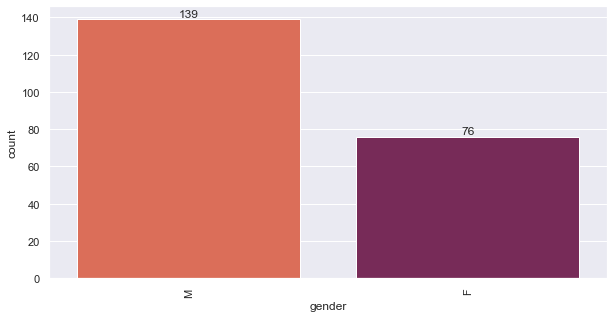

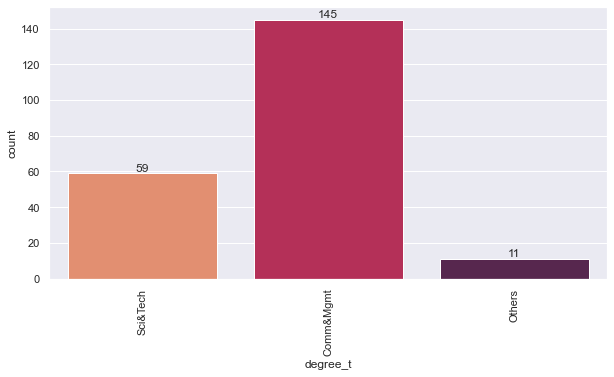

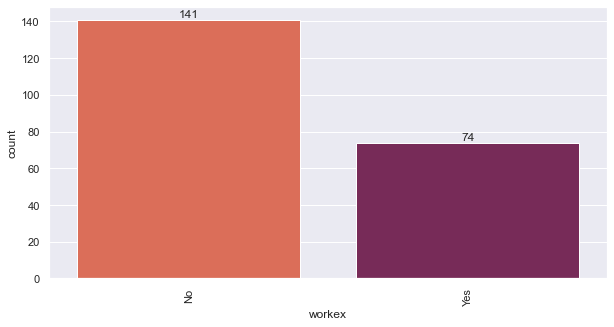

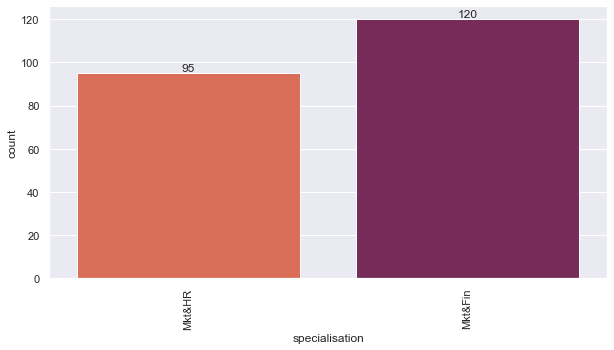

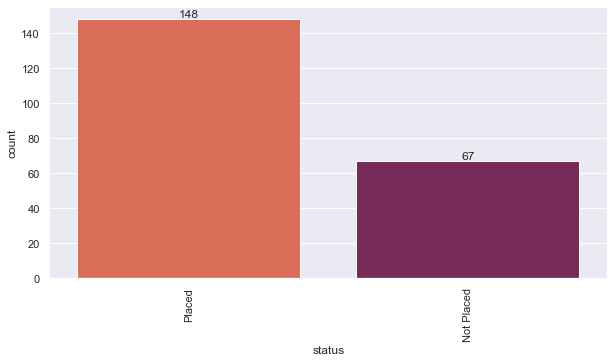

In [202]:
for column in employees_cat:
    plt.figure(figsize = (10, 5))
    print(employees_cat[column].value_counts())
    plot = sns.countplot(x = column, data = employees_cleaned, palette='rocket_r')
    print(plot)
    sns.color_palette("magma", as_cmap=True)
    plt.xticks(rotation = 90)
    for p in plot.patches:
         plot.annotate(p.get_height(), 
                            (p.get_x() + p.get_width() / 2.0, 
                             p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 5),
                            textcoords = 'offset points')

(0.07601740483420488, 0.005223874309528479)


/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


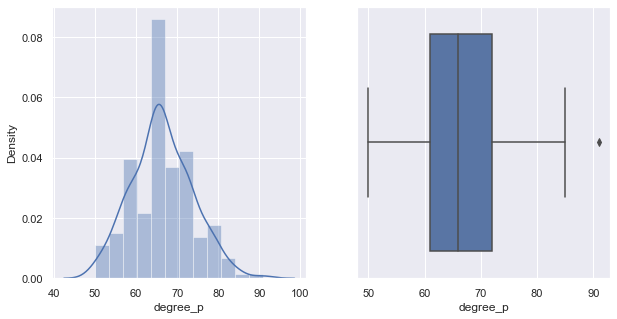

/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



(0.09339316785989649, 0.0009999999999998899)


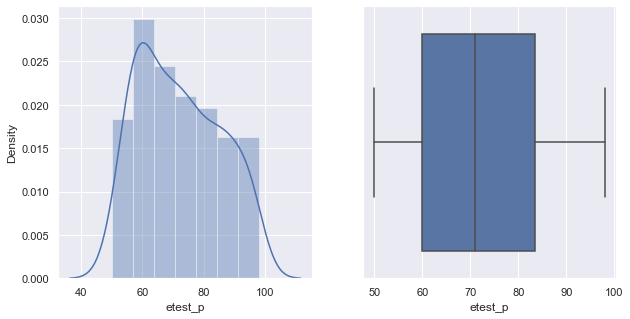


(0.05211882843109117, 0.19436832465799056)


/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


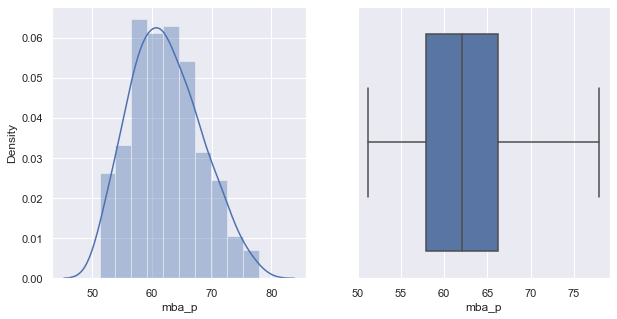

In [203]:
for column in employees_num:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(employees_num[column], kde=True, ax=ax[0])
    sns.boxplot(employees_num[column], orient='h', ax=ax[1])
    print(diagnostic.kstest_normal(employees_num[column]))
    plt.show()
    print('');

In [204]:
employees_cleaned['degree_t'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [205]:
employees_cleaned['degree_t'] = employees_cleaned['degree_t'].replace({"Comm&Mgmt":1, "Sci&Tech":2,"Others":3})
employees_cleaned['degree_t'].unique()

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/23876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned['degree_t'] = employees_cleaned['degree_t'].replace({"Comm&Mgmt":1, "Sci&Tech":2,"Others":3})


array([2, 1, 3])

In [206]:
employees_cleaned['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

In [207]:
employees_cleaned['specialisation'] = employees_cleaned['specialisation'].replace({"Mkt&Fin":1, "Mkt&HR":2})

employees_cleaned['specialisation'].value_counts()

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/2650560728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned['specialisation'] = employees_cleaned['specialisation'].replace({"Mkt&Fin":1, "Mkt&HR":2})


1    120
2     95
Name: specialisation, dtype: int64

In [208]:
def boolean_parser(row, first_pattern, second_pattern):
    if row == first_pattern:
        return 1
    elif row == second_pattern:
        return 0
    else:
        row

In [209]:
employees_cleaned['gender'] = employees_cleaned['gender'].apply(lambda x: boolean_parser(x, 'M', 'F'))
employees_cleaned['gender'].value_counts()

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/3224257224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned['gender'] = employees_cleaned['gender'].apply(lambda x: boolean_parser(x, 'M', 'F'))


1    139
0     76
Name: gender, dtype: int64

In [210]:
employees_cleaned['workex'] = employees_cleaned['workex'].apply(lambda x: boolean_parser(x, 'Yes', 'No'))
employees_cleaned['workex'].value_counts()

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/1742690154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned['workex'] = employees_cleaned['workex'].apply(lambda x: boolean_parser(x, 'Yes', 'No'))


0    141
1     74
Name: workex, dtype: int64

In [211]:
employees_cleaned['status'] = employees_cleaned['status'].apply(lambda x: boolean_parser(x, 'Placed', 'Not Placed'))
employees_cleaned['status'].value_counts()

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/2018315300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned['status'] = employees_cleaned['status'].apply(lambda x: boolean_parser(x, 'Placed', 'Not Placed'))


1    148
0     67
Name: status, dtype: int64

In [212]:
def downscale(score):
    return score/10/2

In [213]:
employees_cleaned

,gender,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,58.00,2,0,55.0,2,58.80,1
1,1,77.48,2,1,86.5,1,66.28,1
2,1,64.00,1,0,75.0,1,57.80,1
3,1,52.00,2,0,66.0,2,59.43,0
4,1,73.30,1,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...
210,1,77.60,1,0,91.0,1,74.49,1
211,1,72.00,2,0,74.0,1,53.62,1
212,1,73.00,1,1,59.0,1,69.72,1
213,0,58.00,1,0,70.0,2,60.23,1


In [214]:
def downscale(score):
    return score/10/2

employees_cleaned[['degree_p']] = employees_cleaned[['degree_p']].apply(downscale)
employees_cleaned[['mba_p']] = employees_cleaned[['mba_p']].apply(downscale)

/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/4163090432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned[['degree_p']] = employees_cleaned[['degree_p']].apply(downscale)
/var/folders/dm/mxz6j4h90psdrp7fypj_85vm0000gn/T/ipykernel_16787/4163090432.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employees_cleaned[['mba_p']] = employees_cleaned[['mba_p']].apply(downscale)


In [215]:
employees_corr = employees_cleaned.corr()

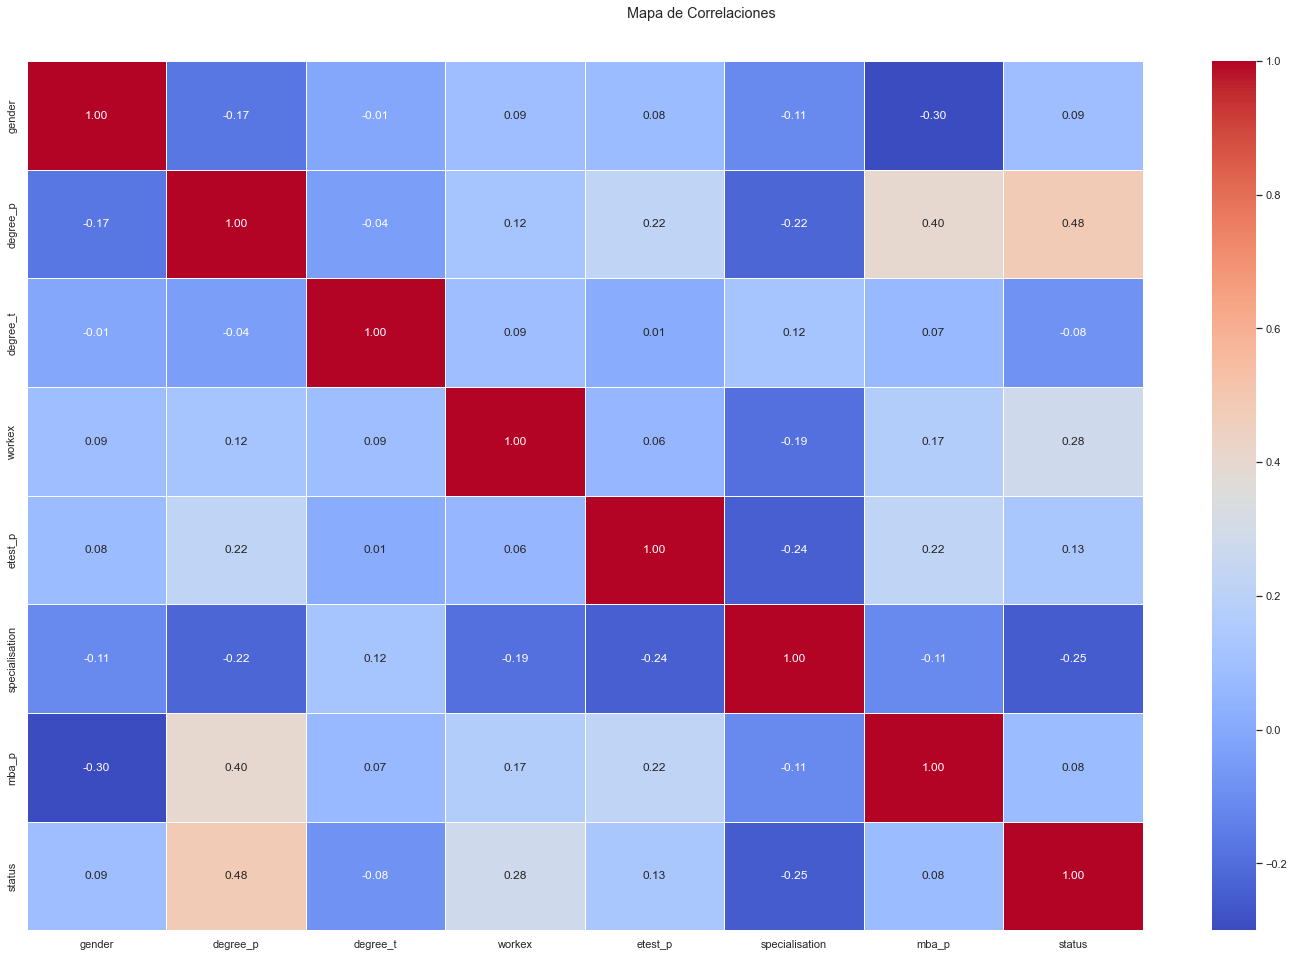

In [216]:
sns.set()

fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(round(employees_corr, 2), annot=True, ax=ax, cmap='coolwarm',
            fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top=0.93)
fig.suptitle('Mapa de Correlaciones');

In [217]:
# Separating into dependent and independent variables
X = employees_cleaned.drop(['status', 'degree_t', 'specialisation'], axis=1)
y = employees_cleaned.status


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

y_train

204    1
175    0
142    1
104    1
136    0
      ..
123    1
140    1
120    0
59     1
196    1
Name: status, Length: 172, dtype: int64

In [219]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [220]:
# Prediction and testing
y_pred = model.predict(X_test)

# Report and Accuracy Score
from sklearn import metrics
from sklearn.metrics import classification_report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report RF:\n",classification_report(y_test,y_pred))

Accuracy: 0.8372093023255814
Classification Report RF:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.88      0.91      0.89        32

    accuracy                           0.84        43
   macro avg       0.79      0.77      0.78        43
weighted avg       0.83      0.84      0.83        43



In [224]:

# Sample 1
sample = np.array([[0, 2.9, 1, 78.50, 3.7]])
print(model.predict(sample))

# Sample 2
sample = np.array([[1, 3.9, 1, 78.50, 3.7]])
print(model.predict(sample))

[0]
[1]


/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/franciscoponce/Desktop/hiring-employees/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
